In [1]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

from mne import read_epochs, set_log_level
from mne.decoding import CSP
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [2]:
set_log_level('warning')
epochs = read_epochs('ica_epo.fif')

In [3]:
def dwt_coeff(x, lvl=1, db='db2'):
    coeff = pywt.wavedec(x, db, mode='sym')
    return coeff[lvl]

def avg_pwr(x):
    return np.average(x)

def standarize(array, mean, std):
    return (array-mean)/std

def energy(x):
    return np.sum(x**2)

def std(x):
    return np.std(x)

def max_coeff(x):
    return np.max(x)

def max_coeff(x):
    return np.min(x)


In [4]:
pca = PCA(n_components=0.9)
le = LabelEncoder()
scaler = StandardScaler()
linear_svm = svm.SVC()
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')

Load epochs

In [5]:
conditions = ['left','rest']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.2,400,100)

Vizualize data

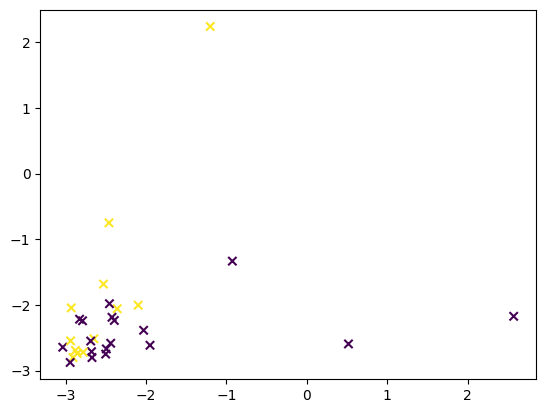

In [6]:
csp = CSP(n_components=12, reg=None, log=True, norm_trace=False, rank='info')
train_data = subset.copy().crop(.4,1.9).filter(60,90).get_data()    
data = csp.fit_transform(train_data, y)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=y, marker='x')

In [11]:
csp_test_classifiers(8,time_config, 18, 7)

Epoch 1/15
1/1 [==============================] - 1s 676ms/step - loss: 0.2611 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2604 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2597 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2591 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2584 - accuracy: 0.5833
Epoch 6/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2577 - accuracy: 0.5833
Epoch 7/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2571 - accuracy: 0.5833
Epoch 8/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2564 - accuracy: 0.5833
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2558 - accuracy: 0.5833
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2551 - accuracy: 0.5833
Epoch 11/15
1/1 [==================

1/1 [==============================] - 0s 115ms/step - loss: 0.2815 - accuracy: 0.6667
Epoch 1/15
1/1 [==============================] - 1s 524ms/step - loss: 0.3744 - accuracy: 0.2917
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3733 - accuracy: 0.2917
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3722 - accuracy: 0.2917
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3711 - accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3700 - accuracy: 0.3750
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3689 - accuracy: 0.3750
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3678 - accuracy: 0.4167
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3667 - accuracy: 0.4167
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3656 - accuracy: 0.4167
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3625 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2530 - accuracy: 0.6667
Epoch 1/15
1/1 [==============================] - 1s 550ms/step - loss: 0.2238 - accuracy: 0.5833
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2231 - accuracy: 0.5833
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2224 - accuracy: 0.5833
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2216 - accuracy: 0.5833
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2209 - accuracy: 0.5833
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2202 - accuracy: 0.5833
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2195 - accuracy: 0.5833
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2188 - accuracy: 0.5833
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3625 - accuracy: 0.4583
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3614 - accuracy: 0.4583
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3602 - accuracy: 0.4583
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3590 - accuracy: 0.4583
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3578 - accuracy: 0.4583
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3566 - accuracy: 0.4583
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3554 - accuracy: 0.4583
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3542 - accuracy: 0.4583
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3531 - accuracy: 0.4583
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3519 - accuracy: 0.4583
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.3392 - accuracy: 0.4167
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3382 - accuracy: 0.4167
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3373 - accuracy: 0.4167
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3364 - accuracy: 0.4167
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3354 - accuracy: 0.4167
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3345 - accuracy: 0.4167
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3336 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.3946 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 1s 514ms/step - loss: 0.2166 - accuracy: 0.5417
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2159 - accuracy: 0.5417
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3053 - accuracy: 0.3750
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3038 - accuracy: 0.3750
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.4137 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 1s 505ms/step - loss: 0.2790 - accuracy: 0.4167
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2785 - accuracy: 0.4167
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2779 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2773 - accuracy: 0.4167
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2768 - accuracy: 0.4167
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2763 - accuracy: 0.4167
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2757 - accuracy: 0.4167
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2494 - accuracy: 0.7083
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2488 - accuracy: 0.7083
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2481 - accuracy: 0.7083
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2474 - accuracy: 0.7083
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2468 - accuracy: 0.7083
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2461 - accuracy: 0.7083
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2455 - accuracy: 0.7083
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2448 - accuracy: 0.7083
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2442 - accuracy: 0.7083
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2435 - accuracy: 0.7083
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 5ms/step - loss: 0.2458 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2453 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2448 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2443 - accuracy: 0.5417
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2438 - accuracy: 0.5417
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2433 - accuracy: 0.5417
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2428 - accuracy: 0.5417
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2423 - accuracy: 0.5417
Epoch 15/15
1/1 [==============================] - 0s 130ms/step - loss: 0.2873 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 1s 583ms/step - loss: 0.2579 - accuracy: 0.6250
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2768 - accuracy: 0.7083
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2761 - accuracy: 0.7083
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2754 - accuracy: 0.7083
Epoch 15/15
1/1 [==============================] - 0s 132ms/step - loss: 0.2660 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 521ms/step - loss: 0.1932 - accuracy: 0.6250
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1924 - accuracy: 0.6250
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1916 - accuracy: 0.6250
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1909 - accuracy: 0.6250
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1901 - accuracy: 0.6250
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1893 - accuracy: 0.6250
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 559ms/step - loss: 0.4085 - accuracy: 0.3750
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4074 - accuracy: 0.3750
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.4064 - accuracy: 0.3750
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4053 - accuracy: 0.3750
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4043 - accuracy: 0.3750
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4033 - accuracy: 0.3750
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4022 - accuracy: 0.3750
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4012 - accuracy: 0.3750
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4001 - accuracy: 0.3750
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3991 - accuracy: 0.3750
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2253 - accuracy: 0.5833
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2245 - accuracy: 0.5833
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2236 - accuracy: 0.5833
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2228 - accuracy: 0.5833
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2219 - accuracy: 0.5833
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2211 - accuracy: 0.5833
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2202 - accuracy: 0.6250
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2194 - accuracy: 0.6250
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2185 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 110ms/step - loss: 0.1496 - accuracy: 0.8333
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2579 - accuracy: 0.6667
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2572 - accuracy: 0.6667
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2566 - accuracy: 0.6667
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2559 - accuracy: 0.6667
Epoch 15/15
1/1 [==============================] - 0s 132ms/step - loss: 0.2622 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 554ms/step - loss: 0.3072 - accuracy: 0.4167
Epoch 2/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3065 - accuracy: 0.4167
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3058 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3051 - accuracy: 0.4167
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3044 - accuracy: 0.4167
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 114ms/step - loss: 0.2150 - accuracy: 0.6667
Epoch 1/15
1/1 [==============================] - 1s 550ms/step - loss: 0.2315 - accuracy: 0.7500
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2309 - accuracy: 0.7500
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2303 - accuracy: 0.7500
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2297 - accuracy: 0.7500
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2292 - accuracy: 0.7500
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2286 - accuracy: 0.7500
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2280 - accuracy: 0.7500
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2275 - accuracy: 0.7500
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2269 - accuracy: 0.7500
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2123 - accuracy: 0.7083
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2115 - accuracy: 0.7083
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2106 - accuracy: 0.7083
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2098 - accuracy: 0.7083
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2089 - accuracy: 0.7500
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2081 - accuracy: 0.7500
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2072 - accuracy: 0.7500
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2064 - accuracy: 0.7500
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2056 - accuracy: 0.7500
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2047 - accuracy: 0.7500
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.1927 - accuracy: 0.6250
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1921 - accuracy: 0.6250
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1916 - accuracy: 0.6250
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1911 - accuracy: 0.6250
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1906 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.4448 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 1s 532ms/step - loss: 0.3552 - accuracy: 0.4167
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3539 - accuracy: 0.4167
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3525 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3512 - accuracy: 0.4167
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 116ms/step - loss: 0.2669 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 513ms/step - loss: 0.3562 - accuracy: 0.2917
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3549 - accuracy: 0.2917
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3536 - accuracy: 0.2917
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3523 - accuracy: 0.2917
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3510 - accuracy: 0.2917
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3497 - accuracy: 0.2917
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3484 - accuracy: 0.2917
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3472 - accuracy: 0.2917
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3459 - accuracy: 0.2917
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2774 - accuracy: 0.5833
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2763 - accuracy: 0.5833
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2752 - accuracy: 0.5833
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2742 - accuracy: 0.5833
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2731 - accuracy: 0.5833
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2720 - accuracy: 0.5833
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2710 - accuracy: 0.5833
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2699 - accuracy: 0.5833
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2688 - accuracy: 0.5833
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2677 - accuracy: 0.5833
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3163 - accuracy: 0.5417
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3152 - accuracy: 0.5417
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3141 - accuracy: 0.5417
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3131 - accuracy: 0.5417
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3120 - accuracy: 0.5417
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3109 - accuracy: 0.5417
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.2608 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 1s 517ms/step - loss: 0.1904 - accuracy: 0.7083
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1899 - accuracy: 0.7083
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1893 - accuracy: 0.7083
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3182 - accuracy: 0.3750
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.3677 - accuracy: 0.1667
Epoch 1/15
1/1 [==============================] - 1s 565ms/step - loss: 0.3149 - accuracy: 0.3750
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3137 - accuracy: 0.3750
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3125 - accuracy: 0.3750
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3114 - accuracy: 0.3750
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3102 - accuracy: 0.3750
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3090 - accuracy: 0.3750
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3079 - accuracy: 0.3750
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3067 - accuracy: 0.4583
Epoch 9/15
1/1 [==============================

In [18]:
dwt_test_classifiers(3,'db4',time_config)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
1/1 [==============================] - 1s 705ms/step - loss: 0.2449 - accuracy: 0.5862
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2444 - accuracy: 0.6207
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2439 - accuracy: 0.6207
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2435 - accuracy: 0.6207
Epoch 5/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2430 - accuracy: 0.6207
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2425 - accuracy: 0.6207
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2420 - accuracy: 0.6207
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2415 - accuracy: 0.6207
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2410 - accuracy: 0.6207
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2405 - accuracy: 0.6552
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 8ms/step - loss: 0.3199 - accuracy: 0.5172
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3193 - accuracy: 0.5172
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3187 - accuracy: 0.5172
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3180 - accuracy: 0.5172
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3174 - accuracy: 0.5172
Epoch 11/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3168 - accuracy: 0.5172
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3161 - accuracy: 0.5172
Epoch 13/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3155 - accuracy: 0.5172
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3149 - accuracy: 0.5172
Epoch 15/15
1/1 [==============================] - 0s 156ms/step - loss: 0.2785 - accuracy: 0.3750
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2917 - accuracy: 0.4483
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2912 - accuracy: 0.4483
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2907 - accuracy: 0.4483
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2902 - accuracy: 0.4483
Epoch 15/15
1/1 [==============================] - 0s 147ms/step - loss: 0.2928 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 700ms/step - loss: 0.2711 - accuracy: 0.5172
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2703 - accuracy: 0.5172
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2694 - accuracy: 0.5172
Epoch 4/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2686 - accuracy: 0.5172
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2678 - accuracy: 0.5172
Epoch 6/15
1/1 [==========================

1/1 [==============================] - 0s 131ms/step - loss: 0.2720 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 604ms/step - loss: 0.3226 - accuracy: 0.4483
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3221 - accuracy: 0.4483
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3216 - accuracy: 0.4483
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3211 - accuracy: 0.4483
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3206 - accuracy: 0.4483
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3201 - accuracy: 0.4483
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3196 - accuracy: 0.4483
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3192 - accuracy: 0.4483
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3187 - accuracy: 0.4483
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3099 - accuracy: 0.4483
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3092 - accuracy: 0.4483
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3085 - accuracy: 0.4483
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3078 - accuracy: 0.4483
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3072 - accuracy: 0.4483
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3065 - accuracy: 0.4483
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3058 - accuracy: 0.4483
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3051 - accuracy: 0.4483
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3045 - accuracy: 0.4483
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3038 - accuracy: 0.4483
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2908 - accuracy: 0.5172
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2902 - accuracy: 0.5172
Epoch 12/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2896 - accuracy: 0.5172
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2890 - accuracy: 0.5172
Epoch 14/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2885 - accuracy: 0.5172
Epoch 15/15
1/1 [==============================] - 0s 128ms/step - loss: 0.3258 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 677ms/step - loss: 0.2638 - accuracy: 0.4483
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2632 - accuracy: 0.4483
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2625 - accuracy: 0.4483
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2619 - accuracy: 0.4483
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 136ms/step - loss: 0.3966 - accuracy: 0.1250
Epoch 1/15
1/1 [==============================] - 1s 550ms/step - loss: 0.3143 - accuracy: 0.4138
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3133 - accuracy: 0.4138
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3124 - accuracy: 0.4138
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3115 - accuracy: 0.4138
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3106 - accuracy: 0.4138
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3097 - accuracy: 0.4138
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3088 - accuracy: 0.4138
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3079 - accuracy: 0.4138
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3070 - accuracy: 0.4138
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 0.3550 - accuracy: 0.3793
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3543 - accuracy: 0.3793
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3536 - accuracy: 0.3793
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3528 - accuracy: 0.3793
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3521 - accuracy: 0.3793
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3514 - accuracy: 0.3793
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3507 - accuracy: 0.3793
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3500 - accuracy: 0.3793
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3493 - accuracy: 0.3793
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3486 - accuracy: 0.3793
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2675 - accuracy: 0.5862
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2669 - accuracy: 0.5862
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2664 - accuracy: 0.5862
Epoch 12/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2658 - accuracy: 0.5862
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2653 - accuracy: 0.5862
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2647 - accuracy: 0.5862
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.2669 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 610ms/step - loss: 0.2867 - accuracy: 0.5172
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2860 - accuracy: 0.4828
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2852 - accuracy: 0.4828
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2657 - accuracy: 0.5172
Epoch 15/15
1/1 [==============================] - 0s 124ms/step - loss: 0.2401 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 541ms/step - loss: 0.3611 - accuracy: 0.3793
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3605 - accuracy: 0.3793
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3599 - accuracy: 0.3793
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3593 - accuracy: 0.3793
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3587 - accuracy: 0.3793
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3581 - accuracy: 0.3793
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3575 - accuracy: 0.3793
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3569 - accuracy: 0.3793
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2682 - accuracy: 0.6207
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2675 - accuracy: 0.6207
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2668 - accuracy: 0.6207
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2662 - accuracy: 0.6207
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2655 - accuracy: 0.6207
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2649 - accuracy: 0.6207
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2642 - accuracy: 0.6207
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2635 - accuracy: 0.6207
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2629 - accuracy: 0.6207
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2622 - accuracy: 0.6207
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.3300 - accuracy: 0.5172
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3293 - accuracy: 0.5172
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3286 - accuracy: 0.5172
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3279 - accuracy: 0.5172
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3272 - accuracy: 0.5172
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3266 - accuracy: 0.5172
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3259 - accuracy: 0.5172
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.4068 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 577ms/step - loss: 0.3383 - accuracy: 0.5172
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3373 - accuracy: 0.5172
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 7ms/step - loss: 0.2798 - accuracy: 0.4828
Epoch 14/15
1/1 [==============================] - 0s 14ms/step - loss: 0.2792 - accuracy: 0.4828
Epoch 15/15
1/1 [==============================] - 0s 157ms/step - loss: 0.3133 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 630ms/step - loss: 0.3088 - accuracy: 0.4483
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3077 - accuracy: 0.4483
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3066 - accuracy: 0.4483
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3056 - accuracy: 0.4483
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3045 - accuracy: 0.4483
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3034 - accuracy: 0.4483
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3023 - accuracy: 0.4483
Epoch 8/15
1/1 [============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3271 - accuracy: 0.4138
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3266 - accuracy: 0.4138
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3262 - accuracy: 0.4138
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3257 - accuracy: 0.4138
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3253 - accuracy: 0.4138
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3248 - accuracy: 0.4138
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3243 - accuracy: 0.4138
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3239 - accuracy: 0.4138
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3234 - accuracy: 0.4138
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3230 - accuracy: 0.4138
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.2836 - accuracy: 0.4483
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2830 - accuracy: 0.4483
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2824 - accuracy: 0.4483
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2818 - accuracy: 0.4483
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2811 - accuracy: 0.4483
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2805 - accuracy: 0.4483
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2799 - accuracy: 0.4483
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2793 - accuracy: 0.4483
Epoch 15/15
1/1 [==============================] - 0s 127ms/step - loss: 0.3282 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 589ms/step - loss: 0.2895 - accuracy: 0.3793
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2692 - accuracy: 0.4828
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2685 - accuracy: 0.5172
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2678 - accuracy: 0.5172
Epoch 15/15
1/1 [==============================] - 0s 130ms/step - loss: 0.3506 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 550ms/step - loss: 0.2746 - accuracy: 0.6207
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2740 - accuracy: 0.6207
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2733 - accuracy: 0.6207
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2727 - accuracy: 0.6207
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2721 - accuracy: 0.6207
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2715 - accuracy: 0.6207
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 1s/step - loss: 0.3094 - accuracy: 0.4138
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3084 - accuracy: 0.4138
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3075 - accuracy: 0.4138
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3065 - accuracy: 0.4138
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3055 - accuracy: 0.4138
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3046 - accuracy: 0.4138
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3036 - accuracy: 0.4138
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3027 - accuracy: 0.4138
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3017 - accuracy: 0.4483
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3008 - accuracy: 0.4483
Epoch 11/15
1/1 [==============================] - 

1/1 [==============================] - 0s 6ms/step - loss: 0.3359 - accuracy: 0.3793
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3350 - accuracy: 0.3793
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3341 - accuracy: 0.3793
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3333 - accuracy: 0.3793
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3324 - accuracy: 0.3793
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3315 - accuracy: 0.3793
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3306 - accuracy: 0.3793
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3298 - accuracy: 0.3793
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3290 - accuracy: 0.3793
Epoch 15/15
1/1 [==============================] - 0s 140ms/step - loss: 0.1614 - accuracy: 1.0000
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2384 - accuracy: 0.5517
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2379 - accuracy: 0.5517
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2374 - accuracy: 0.5517
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2369 - accuracy: 0.5517
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.2845 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 578ms/step - loss: 0.2398 - accuracy: 0.5517
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2393 - accuracy: 0.5517
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2389 - accuracy: 0.5517
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2385 - accuracy: 0.5517
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2381 - accuracy: 0.5517
Epoch 6/15
1/1 [===========================

left vs right

In [15]:
conditions = ['left','right']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (1,0.2,1000,0)

In [16]:
csp_test_classifiers(8,time_config, 18, 7)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
1/1 [==============================] - 1s 829ms/step - loss: 0.3081 - accuracy: 0.2759
Epoch 2/15
1/1 [==============================] - 0s 13ms/step - loss: 0.3063 - accuracy: 0.5517
Epoch 3/15
1/1 [==============================] - 0s 14ms/step - loss: 0.3044 - accuracy: 0.5517
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3025 - accuracy: 0.5862
Epoch 5/15
1/1 [==============================] - 0s 19ms/step - loss: 0.3006 - accuracy: 0.5862
Epoch 6/15
1/1 [==============================] - 0s 14ms/step - loss: 0.2987 - accuracy: 0.5862
Epoch 7/15
1/1 [==============================] - 0s 12ms/step - loss: 0.2969 - accuracy: 0.6207
Epoch 8/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2950 - accuracy: 0.6207
Epoch 9/15
1/1 [==============================] - 0s 12ms/step - loss: 0.2931 - accuracy: 0.6207
Epoch 10/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2912 - accuracy: 0.6207
Epoch 11/15
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.2037 - accuracy: 0.5862
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2028 - accuracy: 0.5862
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2019 - accuracy: 0.5862
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2010 - accuracy: 0.5862
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2001 - accuracy: 0.5862
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1992 - accuracy: 0.5862
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1983 - accuracy: 0.5862
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1974 - accuracy: 0.5862
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1965 - accuracy: 0.5862
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.3294 - accuracy: 0.2500
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2791 - accuracy: 0.4138
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2775 - accuracy: 0.4138
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2760 - accuracy: 0.4138
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2745 - accuracy: 0.4483
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.2505 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 620ms/step - loss: 0.3924 - accuracy: 0.3793
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3901 - accuracy: 0.3448
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3877 - accuracy: 0.3448
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3854 - accuracy: 0.3448
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3830 - accuracy: 0.3448
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 115ms/step - loss: 0.2768 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 935ms/step - loss: 0.2854 - accuracy: 0.5172
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2839 - accuracy: 0.6207
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2824 - accuracy: 0.6207
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2808 - accuracy: 0.6207
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2792 - accuracy: 0.6207
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2775 - accuracy: 0.6207
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2759 - accuracy: 0.6207
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2742 - accuracy: 0.6207
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2726 - accuracy: 0.6207
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2526 - accuracy: 0.5172
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2508 - accuracy: 0.5172
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 0.5172
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2472 - accuracy: 0.5172
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2454 - accuracy: 0.5172
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2436 - accuracy: 0.5172
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2419 - accuracy: 0.5172
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2401 - accuracy: 0.5172
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2383 - accuracy: 0.5172
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2366 - accuracy: 0.5172
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3181 - accuracy: 0.4138
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3164 - accuracy: 0.4138
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3146 - accuracy: 0.4138
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3129 - accuracy: 0.4138
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3112 - accuracy: 0.4138
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.2790 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 506ms/step - loss: 0.3236 - accuracy: 0.2414
Epoch 2/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3220 - accuracy: 0.2414
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3205 - accuracy: 0.2759
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3190 - accuracy: 0.2759
Epoch 5/15
1/1 [=========================

1/1 [==============================] - 0s 113ms/step - loss: 0.2023 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 508ms/step - loss: 0.4213 - accuracy: 0.3103
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4189 - accuracy: 0.3103
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4165 - accuracy: 0.3103
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4141 - accuracy: 0.3103
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4116 - accuracy: 0.3448
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4092 - accuracy: 0.3448
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4067 - accuracy: 0.3448
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4043 - accuracy: 0.3448
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4019 - accuracy: 0.3448
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2189 - accuracy: 0.5862
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2176 - accuracy: 0.5862
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2162 - accuracy: 0.5862
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2149 - accuracy: 0.5862
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2135 - accuracy: 0.5862
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2122 - accuracy: 0.5862
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2108 - accuracy: 0.6207
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2095 - accuracy: 0.6207
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2082 - accuracy: 0.6207
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2068 - accuracy: 0.6207
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2811 - accuracy: 0.4138
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2798 - accuracy: 0.4138
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2785 - accuracy: 0.4138
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2772 - accuracy: 0.4828
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2759 - accuracy: 0.4828
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2747 - accuracy: 0.5172
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2900 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 500ms/step - loss: 0.3436 - accuracy: 0.5517
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3412 - accuracy: 0.3793
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3388 - accuracy: 0.4483
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.1848 - accuracy: 0.6207
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.3300 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 510ms/step - loss: 0.2121 - accuracy: 0.6207
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2107 - accuracy: 0.6552
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2093 - accuracy: 0.6897
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2079 - accuracy: 0.6897
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2065 - accuracy: 0.6897
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2051 - accuracy: 0.6897
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2037 - accuracy: 0.6897
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2023 - accuracy: 0.6897
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2058 - accuracy: 0.7931
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2046 - accuracy: 0.7931
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2034 - accuracy: 0.7931
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2023 - accuracy: 0.7931
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2011 - accuracy: 0.7931
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2000 - accuracy: 0.7931
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1989 - accuracy: 0.7931
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1978 - accuracy: 0.7931
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1967 - accuracy: 0.7931
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1956 - accuracy: 0.7931
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.2632 - accuracy: 0.3793
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2623 - accuracy: 0.3793
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2613 - accuracy: 0.3793
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2604 - accuracy: 0.3793
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2595 - accuracy: 0.3793
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2586 - accuracy: 0.3793
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2577 - accuracy: 0.3793
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2493 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 0s 483ms/step - loss: 0.2965 - accuracy: 0.3793
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2954 - accuracy: 0.3793
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2686 - accuracy: 0.5172
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2673 - accuracy: 0.5172
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2382 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 515ms/step - loss: 0.2996 - accuracy: 0.5517
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2982 - accuracy: 0.5862
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2969 - accuracy: 0.5862
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2955 - accuracy: 0.5862
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2941 - accuracy: 0.5862
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2928 - accuracy: 0.5862
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2914 - accuracy: 0.5862
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2036 - accuracy: 0.8966
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2026 - accuracy: 0.8966
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2016 - accuracy: 0.8966
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2006 - accuracy: 0.8966
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1996 - accuracy: 0.8966
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1986 - accuracy: 0.8966
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1976 - accuracy: 0.8966
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1966 - accuracy: 0.8966
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1956 - accuracy: 0.8966
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1946 - accuracy: 0.8966
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 5ms/step - loss: 0.2295 - accuracy: 0.6897
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2287 - accuracy: 0.6897
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2279 - accuracy: 0.6897
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2271 - accuracy: 0.6897
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2264 - accuracy: 0.6897
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2256 - accuracy: 0.6897
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2248 - accuracy: 0.6897
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2241 - accuracy: 0.6897
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.2316 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 0s 485ms/step - loss: 0.4364 - accuracy: 0.1724
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.4918 - accuracy: 0.1379
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4902 - accuracy: 0.1379
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4886 - accuracy: 0.1724
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2994 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 515ms/step - loss: 0.3289 - accuracy: 0.4483
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3271 - accuracy: 0.4138
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3254 - accuracy: 0.4138
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3237 - accuracy: 0.4138
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3220 - accuracy: 0.4138
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3203 - accuracy: 0.4138
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 528ms/step - loss: 0.2776 - accuracy: 0.6552
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2758 - accuracy: 0.6552
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2740 - accuracy: 0.6552
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2723 - accuracy: 0.6552
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2706 - accuracy: 0.6552
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2688 - accuracy: 0.6552
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2671 - accuracy: 0.6552
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2654 - accuracy: 0.6552
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2637 - accuracy: 0.6552
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2620 - accuracy: 0.6552
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.4101 - accuracy: 0.2759
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4084 - accuracy: 0.2759
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4067 - accuracy: 0.2759
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4050 - accuracy: 0.2759
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4032 - accuracy: 0.2759
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4015 - accuracy: 0.2759
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3998 - accuracy: 0.2759
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3980 - accuracy: 0.2759
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3963 - accuracy: 0.2759
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.2508 - accuracy: 0.6250
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.1567 - accuracy: 0.8276
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1556 - accuracy: 0.8621
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1544 - accuracy: 0.8621
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1533 - accuracy: 0.8621
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.2279 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 521ms/step - loss: 0.1753 - accuracy: 0.7241
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1740 - accuracy: 0.7586
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1727 - accuracy: 0.7586
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1714 - accuracy: 0.7586
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1702 - accuracy: 0.7586
Epoch 6/15
1/1 [===========================

In [17]:
dwt_test_classifiers(1,'db7',time_config)

Epoch 1/15
1/1 [==============================] - 1s 553ms/step - loss: 0.3271 - accuracy: 0.4138
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3255 - accuracy: 0.4483
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3239 - accuracy: 0.4483
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3222 - accuracy: 0.4483
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3206 - accuracy: 0.4483
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3190 - accuracy: 0.4483
Epoch 7/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3174 - accuracy: 0.4483
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3157 - accuracy: 0.4483
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3141 - accuracy: 0.4483
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3125 - accuracy: 0.4483
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 6ms/step - loss: 0.3587 - accuracy: 0.3793
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3573 - accuracy: 0.3793
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3559 - accuracy: 0.3793
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3545 - accuracy: 0.3793
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3531 - accuracy: 0.3793
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3517 - accuracy: 0.3793
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3503 - accuracy: 0.3793
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3489 - accuracy: 0.3793
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3475 - accuracy: 0.3793
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2670 - accuracy: 0.3750
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2560 - accuracy: 0.4483
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2549 - accuracy: 0.4483
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2537 - accuracy: 0.4483
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2525 - accuracy: 0.4483
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.2382 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 514ms/step - loss: 0.2889 - accuracy: 0.4483
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2877 - accuracy: 0.5172
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2864 - accuracy: 0.5172
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2852 - accuracy: 0.5172
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2840 - accuracy: 0.5172
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 117ms/step - loss: 0.1970 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 539ms/step - loss: 0.2349 - accuracy: 0.5862
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2335 - accuracy: 0.5862
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2321 - accuracy: 0.5862
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2307 - accuracy: 0.5862
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2294 - accuracy: 0.6207
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2280 - accuracy: 0.6207
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2266 - accuracy: 0.6207
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2253 - accuracy: 0.6207
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2239 - accuracy: 0.6207
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2763 - accuracy: 0.4828
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2750 - accuracy: 0.4828
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2737 - accuracy: 0.4828
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2724 - accuracy: 0.4828
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2711 - accuracy: 0.4828
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2698 - accuracy: 0.4828
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2686 - accuracy: 0.4828
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2673 - accuracy: 0.4828
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2660 - accuracy: 0.4828
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2648 - accuracy: 0.4828
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2472 - accuracy: 0.5172
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2463 - accuracy: 0.5172
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2454 - accuracy: 0.5172
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2446 - accuracy: 0.5172
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2437 - accuracy: 0.5172
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.2252 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 531ms/step - loss: 0.3146 - accuracy: 0.4828
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3134 - accuracy: 0.4828
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3123 - accuracy: 0.4828
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3111 - accuracy: 0.4828
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 127ms/step - loss: 0.3270 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 536ms/step - loss: 0.3858 - accuracy: 0.3448
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3842 - accuracy: 0.3448
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3825 - accuracy: 0.3448
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3808 - accuracy: 0.3448
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3792 - accuracy: 0.3448
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3775 - accuracy: 0.3448
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3758 - accuracy: 0.3448
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3742 - accuracy: 0.3448
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3725 - accuracy: 0.3448
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 0.2639 - accuracy: 0.5517
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2625 - accuracy: 0.5517
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2611 - accuracy: 0.5517
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2598 - accuracy: 0.5862
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2584 - accuracy: 0.5862
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2571 - accuracy: 0.5862
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2558 - accuracy: 0.5862
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2545 - accuracy: 0.5862
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2533 - accuracy: 0.5862
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2520 - accuracy: 0.5862
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 8ms/step - loss: 0.2717 - accuracy: 0.5862
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2709 - accuracy: 0.5862
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2701 - accuracy: 0.5862
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2693 - accuracy: 0.5862
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2684 - accuracy: 0.5862
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2676 - accuracy: 0.5862
Epoch 15/15
1/1 [==============================] - 0s 127ms/step - loss: 0.2784 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 610ms/step - loss: 0.2791 - accuracy: 0.4828
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2780 - accuracy: 0.4828
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2768 - accuracy: 0.4828
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 16ms/step - loss: 0.2692 - accuracy: 0.5172
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.2558 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 592ms/step - loss: 0.2471 - accuracy: 0.5517
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2462 - accuracy: 0.5517
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2452 - accuracy: 0.5862
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2442 - accuracy: 0.5862
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2432 - accuracy: 0.5862
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2422 - accuracy: 0.6207
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2412 - accuracy: 0.6207
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2403 - accuracy: 0.6207
Epoch 9/15
1/1 [=============================

1/1 [==============================] - 0s 7ms/step - loss: 0.3061 - accuracy: 0.5172
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3045 - accuracy: 0.5172
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3028 - accuracy: 0.5172
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3012 - accuracy: 0.5172
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2996 - accuracy: 0.5172
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2980 - accuracy: 0.5172
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2964 - accuracy: 0.5172
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2948 - accuracy: 0.5517
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2932 - accuracy: 0.5517
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2916 - accuracy: 0.5517
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.2673 - accuracy: 0.3793
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2661 - accuracy: 0.3793
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2649 - accuracy: 0.3793
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2637 - accuracy: 0.4138
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2625 - accuracy: 0.4483
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2613 - accuracy: 0.4483
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2601 - accuracy: 0.4483
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.1702 - accuracy: 1.0000
Epoch 1/15
1/1 [==============================] - 1s 528ms/step - loss: 0.2732 - accuracy: 0.5517
Epoch 2/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2724 - accuracy: 0.5517
Epoch 3/15
1/1 [========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2719 - accuracy: 0.5172
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2708 - accuracy: 0.5172
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.1790 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 523ms/step - loss: 0.3757 - accuracy: 0.4138
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3741 - accuracy: 0.4138
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3725 - accuracy: 0.4138
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3709 - accuracy: 0.4138
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3693 - accuracy: 0.4138
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3677 - accuracy: 0.4138
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3661 - accuracy: 0.4138
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3156 - accuracy: 0.5517
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3143 - accuracy: 0.5517
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3131 - accuracy: 0.5517
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3118 - accuracy: 0.5517
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3105 - accuracy: 0.5517
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3093 - accuracy: 0.5517
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3080 - accuracy: 0.5517
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3067 - accuracy: 0.5517
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3055 - accuracy: 0.5517
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3043 - accuracy: 0.5517
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 0.2659 - accuracy: 0.4138
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2645 - accuracy: 0.4138
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2632 - accuracy: 0.4138
Epoch 10/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2618 - accuracy: 0.4138
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2605 - accuracy: 0.4138
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2592 - accuracy: 0.4138
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2578 - accuracy: 0.4138
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2565 - accuracy: 0.4138
Epoch 15/15
1/1 [==============================] - 0s 108ms/step - loss: 0.3485 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 0s 478ms/step - loss: 0.3061 - accuracy: 0.4483
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2460 - accuracy: 0.5517
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2448 - accuracy: 0.5517
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2435 - accuracy: 0.5517
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2286 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 0s 484ms/step - loss: 0.2475 - accuracy: 0.5862
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2464 - accuracy: 0.6207
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2453 - accuracy: 0.6552
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2442 - accuracy: 0.6552
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2431 - accuracy: 0.6552
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2420 - accuracy: 0.6552
Epoch 7/15
1/1 [============================

1/1 [==============================] - 0s 473ms/step - loss: 0.3013 - accuracy: 0.4828
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3006 - accuracy: 0.4828
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2999 - accuracy: 0.4828
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2993 - accuracy: 0.4828
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2986 - accuracy: 0.4828
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2980 - accuracy: 0.4828
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2973 - accuracy: 0.4828
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2967 - accuracy: 0.5172
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2961 - accuracy: 0.5172
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2954 - accuracy: 0.5172
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2936 - accuracy: 0.3103
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2922 - accuracy: 0.3103
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2909 - accuracy: 0.3448
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2895 - accuracy: 0.3448
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2882 - accuracy: 0.3448
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2869 - accuracy: 0.3448
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2855 - accuracy: 0.3448
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2842 - accuracy: 0.3448
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2829 - accuracy: 0.3448
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.3620 - accuracy: 0.3750
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2899 - accuracy: 0.4138
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2888 - accuracy: 0.4138
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2877 - accuracy: 0.4138
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2866 - accuracy: 0.4138
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2830 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 0s 477ms/step - loss: 0.2677 - accuracy: 0.5517
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2663 - accuracy: 0.5517
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2650 - accuracy: 0.5862
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2636 - accuracy: 0.5862
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2623 - accuracy: 0.5862
Epoch 6/15
1/1 [===========================

In [7]:
def csp_test_classifiers(n_components, time_config, fmax, fmin):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()    
    
    csp = CSP(n_components=n_components, reg=None, log=True, norm_trace=False, rank='info')
    median_score = []
    
    csp_data = csp.fit_transform(train_data,y)
    rbf_svm = find_best_svc_params(csp_data, y)
    nu_svm = find_best_svc_params(csp_data, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            csp.fit(train_data[train_idx], y_train)
            w_min = 0
            for i in range(n_windows):
                w_max = w_min + width
                X.append(csp.transform(train_data[train_idx, :, w_min:w_max]))
                X_tst.append(csp.transform(train_data[test_idx, :, w_min:w_max]))
                w_min += w_max - overlap
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            
            if X.shape[1] > 12:
                X = pca.fit_transform(X)
                X_tst = pca.transform(X_tst)
    
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)
            
            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [8]:
def dwt_test_classifiers(lvl, db, time_config):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,t_min+.8).get_data()    
    x = np.apply_along_axis(dwt_coeff, 2, train_data, lvl=lvl, db=db)
    X = []
    X.append(np.apply_along_axis(np.mean, 2, x))
    X.append(np.apply_along_axis(energy, 2, x))
    X.append(np.apply_along_axis(np.std, 2, x))
    X.append(np.apply_along_axis(np.max, 2, x))
    X.append(np.apply_along_axis(np.min, 2, x))
    X = np.concatenate(X, axis=1)
    x = pca.fit_transform(X)
    x = scaler.fit_transform(x)
    rbf_svm = find_best_svc_params(x, y)
    nu_svm = find_best_svc_params(x, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            x_tr = np.apply_along_axis(dwt_coeff, 2, train_data[train_idx], lvl=lvl, db=db)
            X.append(np.apply_along_axis(np.mean, 2, x_tr))
            X.append(np.apply_along_axis(energy, 2, x_tr))
            X.append(np.apply_along_axis(np.std, 2, x_tr))
            X.append(np.apply_along_axis(np.max, 2, x_tr))
            X.append(np.apply_along_axis(np.min, 2, x_tr))
            
            X_tst = []
            x_tst = np.apply_along_axis(dwt_coeff, 2, train_data[test_idx], lvl = lvl, db=db)
            X_tst.append(np.apply_along_axis(np.mean, 2, x_tst))
            X_tst.append(np.apply_along_axis(energy, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.std, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.max, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.min, 2, x_tst))
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            X = pca.fit_transform(X)
            X_tst = pca.transform(X_tst)
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)

            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [9]:
def find_best_svc_params(X,ym, kernel='rbf'):
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    if kernel == 'nu':
        param_grid = dict(gamma=gamma_range)
        grid = GridSearchCV(svm.NuSVC(), param_grid=param_grid, cv=cv)
    else:   
        grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    grid.fit(X,y)
    return grid.best_estimator_

In [10]:
def shallow_model(features):
    model = Sequential()
    model.add(Dense(int(features/2), input_shape=(features,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model
